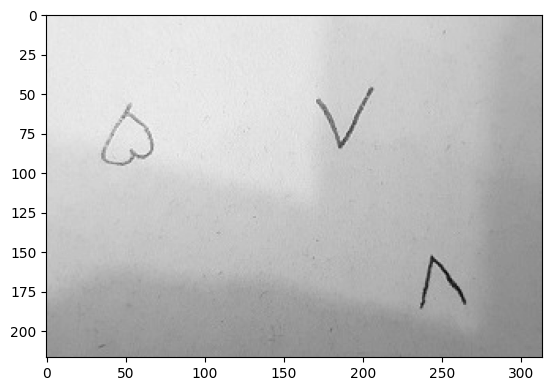

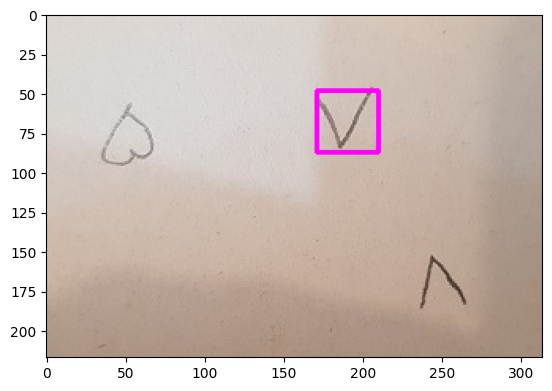

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

image=cv2.imread('adad.jpg')
img=cv2.imread('adad.jpg',0)
plt.imshow(img, cmap='gray'); plt.figure()
img = cv2.GaussianBlur(img, (5,5), 0)
img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,3,-2)
kernell=np.ones((7,7),np.uint8)
kernel=np.ones((2,2),np.uint8)
mpol=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernell)
mpol=cv2.morphologyEx(mpol,cv2.MORPH_OPEN,kernel)
plt.imshow(mpol,cmap='gray')
contours, hierarchy = cv2.findContours(mpol, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


centers=[]
for c in contours:
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    center=[cx,cy]
    centers.append(center)
answer=0
max=0
for c in centers:
    x=math.sqrt(c[0]**2+c[1]**2)
    if(x>max):
        answer=c
i=centers.index(answer)

drawing = image.copy()
boundRect = cv2.boundingRect(contours[i])
cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (255,0,255), 2)
plt.imshow(drawing[...,::-1])